In [1]:


import numpy as np
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec



C:\Users\a1989\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [52]:
import pickle as pkl
# ans = np.random.randint(6, size=(500, ))
label = np.load('label.npy'); print('label loaded')
cut_ques = np.load('cut_Questions.npy');print('Ques loaded')
model = word2vec.Word2Vec.load("word2vec.model");print('vec loaded')
hi_freq = np.load('voc_dict.npy');print('hi_freq loaded')


label loaded
Ques loaded
vec loaded
hi_freq loaded


In [53]:

import numpy as np
import matplotlib.pyplot as plt
def plot_vec_2d(H):
    fig = plt.figure(figsize=(6, 3.2))

    ax = fig.add_subplot(111)
    ax.set_title('colorMap')
    plt.imshow(H)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()

(75, 1)
0.4727838635444641


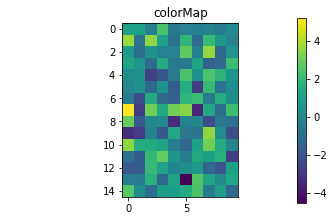

C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.47861862


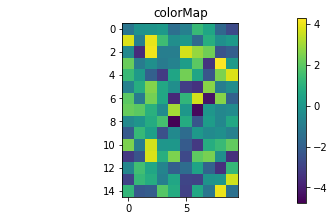

In [54]:
import numpy as np
import skimage.measure
N = 150
n = '電壓'
n1 = '電流'
v = model.wv[n]
v1 = model.wv[n1]
v = v.reshape((N,1))
v1 = v1.reshape((N,1))

vv = skimage.measure.block_reduce(v, (2,1), np.mean)
vv1 = skimage.measure.block_reduce(v1, (2,1), np.mean)
print(vv.shape)
from scipy import spatial

result = 1 - spatial.distance.cosine(vv, vv1)
print(result)

v = v.reshape((15,10))
plot_vec_2d(v)
print(model.wv.similarity(n,n1))

v1 = v1.reshape((15,10))
plot_vec_2d(v1)


In [55]:
# import pickle as pkl
# with open('voc_dict.pkl', 'rb') as handle:
#      hi_freq= pkl.load(handle)
# # hi_freq = np.load('voc_dict.npy');
# HI_MAX = hi_freq['MAX_WORD_COUNT']

# print(d2)
# print('hi_freq loaded')
hi_freq = np.load('voc_dict.npy');print('hi_freq loaded')
# print(hi_freq[:10])

freq = {}
FROM = 0
TO = len(hi_freq)
tmp = np.zeros([TO-FROM,])
for i in range(FROM,TO):
    freq[hi_freq[i][0]] =int(hi_freq[i][1])
    tmp[i-FROM] = int(hi_freq[i][1])
# np.save('voc_dict.npy', d)
# d['MAX_WORD_COUNT'] =voc_dict[0][1]
HI_MAX = int(hi_freq[FROM][1])
print(HI_MAX)

# # print('¬O' in voc_dict[:,0])
# print(voc_dict[0])

hi_freq loaded
612530


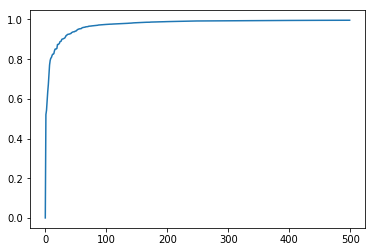

35006
4940


C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.2156263438239932

In [113]:
import pickle
# hi_freq = np.load('word_dict.npy');print('hi_freq loaded')
with open('word_dict.pkl', 'rb') as f:
    hi_freq = pickle.load(f)
import matplotlib.pyplot as plt
plt.plot((HI_MAX-tmp[:500])/HI_MAX)
plt.show()
w1 =  "怎麼"
w2 = "幹嘛"
print(hi_freq[w1])
print(hi_freq[w2])
np.power(model.wv.similarity(w1,w2),4)

In [264]:
hi_freq['要']

119973

In [131]:
w1 = "尿"
w2 = "尿尿"
# res = model.wv.most_similar(w1,topn = 10)
# for item in res:
#     print(item[0],str(item[1]))
print(model.wv.similarity(w1,w2))



0.16122098


C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [57]:
import jieba.posseg as pseg
def subject_cut(word):
    words = pseg.cut(word)
    w = []
    f = []
    for word, flag in words:
        w.append(word)
        f.append(flag)
    return w,f

In [58]:
# bonus = {'因為':['所以'],'就算':['還是']}
# bonus['因']
def group(seq, sep):
    g = []
    for el in seq:
        if el == sep:
            yield g
            g = []
            continue
        g.append(el)
    yield g

ex = ['A', ' ', 'B' , 'C' , ' ' , 'D',' ']
result = list(group(ex, ' '))[-2]
print(result)

['D']


### HERE

In [289]:
import jieba.posseg as pseg
best = 0.696
#for each question
ans = np.zeros([500,])
score = np.zeros([500,6])

for q_id,question in enumerate(cut_ques):
    score[q_id,:] = get_score(question)
    ans[q_id] = np.argmax(score[q_id,:])
    
ans = ans.astype(int)
print('done')
a  = (ans==label)
print('accuracy score:',sum(a)/500)
if sum((a)/500)<best:
    print('warning: score drop!')

C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


done
accuracy score: 0.696


In [287]:
from termcolor import colored
score = np.round(score,2)
for i in range(500):
    try:
        if i in hard:
            print(colored('-------------','green'),i,colored('-------------','green'))
        elif i in shit:
            print(colored('-------------','blue'),i,colored('-------------','blue'))
            
        else:
            print('-------------',i,'-------------')
    except:pass
    
    if ans[i]==label[i]:
        pass
#         print(ans[i],label[i],'\t\t',end = '')
#         for si,s in enumerate(score[i,:]):
# #             if si==ans[i]:
# #                 print(colored(s, 'red'),'\t',end = '')
# #             else:
#                 print(s,'\t',end = '')
#         print('v')
    else:
        print(ans[i],label[i],'\t\t',end = '')
        for si,s in enumerate(score[i,:]):
            if si==ans[i]:
                print(colored(s, 'green'),'\t',end = '')
            elif si == label[i]:
                print(colored(s, 'red'),'\t',end = '')
            else:
                print(s,'\t',end = '')
        print()
hard = set([499,494,492,490,486,481,472,471,469,467,466,465,463,460,449,448,442,439,437,435,423,419,417,416,414,
           396,395,394,388,342,281,197,165,108,93,91,87,59,49,23]) #108切錯
shit = set([18,22,35,36,39,46,48,53,423]) #18:[0,1]
#477: 排除"你我"不排除"他"

------------- 0 -------------
------------- 1 -------------
------------- 2 -------------
------------- 3 -------------
------------- 4 -------------
------------- 5 -------------
------------- 6 -------------
0 2 		0.48 	0.14 	0.48 	0.07 	0.26 	0.2 	
------------- 7 -------------
------------- 8 -------------
1 2 		0.23 	0.51 	0.51 	0.25 	0.06 	0.09 	
------------- 9 -------------
------------- 10 -------------
1 3 		0.05 	0.11 	0.0 	0.04 	0.06 	0.06 	
------------- 11 -------------
2 5 		0.25 	0.34 	1.0 	0.46 	0.16 	0.16 	
------------- 12 -------------
------------- 13 -------------
------------- 14 -------------
5 3 		0.14 	0.02 	0.09 	0.07 	0.11 	0.23 	
------------- 15 -------------
------------- 16 -------------
------------- 17 -------------
------------- 18 -------------
1 0 		0.46 	0.8 	0.11 	0.71 	0.29 	0.06 	
------------- 19 -------------
------------- 20 -------------
------------- 21 -------------
------------- 22 -------------
3 0 		0.53 	0.05 	0.1 	0.95 	0.17 	0.2 	
--

4 1 		0.1 	0.65 	0.17 	0.32 	1.27 	0.4 	
------------- 156 -------------
1 0 		0.8 	1.01 	0.14 	0.02 	0.06 	0.08 	
------------- 157 -------------
5 0 		0.11 	0.13 	0.04 	0.02 	0.04 	0.4 	
------------- 158 -------------
------------- 159 -------------
2 3 		0.05 	0.02 	0.24 	0.12 	0.13 	0.07 	
------------- 160 -------------
------------- 161 -------------
2 5 		0.13 	0.24 	0.52 	0.19 	0.4 	0.3 	
------------- 162 -------------
------------- 163 -------------
2 5 		0.02 	0.03 	0.06 	0.05 	0.01 	0.03 	
------------- 164 -------------
5 3 		0.17 	0.37 	0.8 	0.26 	0.07 	0.98 	
------------- 165 -------------
3 1 		0.46 	0.71 	0.31 	0.71 	0.15 	0.71 	
------------- 166 -------------
------------- 167 -------------
------------- 168 -------------
3 1 		0.7 	0.29 	0.6 	0.71 	0.69 	0.7 	
------------- 169 -------------
------------- 170 -------------
------------- 171 -------------
4 3 		0.71 	0.67 	0.22 	0.55 	0.9 	0.68 	
------------- 172 -------------
0 5 		0.06 	0.0 	0.06 	0.01 	0.05 	0.

3 5 		0.06 	0.07 	0.03 	0.08 	0.07 	0.03 	
------------- 493 -------------
------------- 494 -------------
0 4 		0.52 	0.09 	0.34 	0.23 	0.38 	0.2 	
------------- 495 -------------
------------- 496 -------------
------------- 497 -------------
------------- 498 -------------
------------- 499 -------------
5 4 		0.05 	0.19 	0.11 	0.43 	0.13 	0.63 	


In [176]:
print(cut_ques[108])

[list([['這個', '扁柏', '館', '也', '是', '用', '扁柏', '蓋', '的', '啊'], []])
 list(['紅檜', '因為', '它', '的', '樹皮', '比較', '平滑'])
 list(['這樣子', '紙做', '的', '不會', '被', '吹倒', '嗎'])
 list(['不', '是', ' ', '我們', '是', '用', '紙蓋', '的', '喔'])
 list(['是', '你', '自己', '跳到', '我們', '旁邊', '來', '的'])
 list(['說', '到', '檜木', '你', '會', '想到', '什麼'])
 list(['它', '又', '不會', '說', '救命', '啊'])]


In [147]:
import jieba
import jieba.posseg as pseg
jieba.set_dictionary('big5_dict.txt')
example_str = '曉書 玫瑰花送給你 是不是很漂亮呢'
cut_example_str = jieba.lcut(example_str)
print(cut_example_str) 
words = jieba.posseg.cut("玫瑰花送給你煮一煮")
for word, flag in words:
    print('%s %s' % (word, flag))

Building prefix dict from C:\Users\a1989\Desktop\DL\Comp1\big5_dict.txt ...
Loading model from cache C:\Users\a1989\AppData\Local\Temp\jieba.u13ee1a1953b639ea7ba618182ba7d2dd.cache
Loading model cost 0.838 seconds.
Prefix dict has been built succesfully.


['曉書', ' ', '玫瑰花', '送給', '你', ' ', '是', '不', '是', '很', '漂亮', '呢']
玫瑰花 N
送給 Vt
你 r
煮 v
一 m
煮 v


In [21]:
#use for correcting label file
# label[141] = 3
# np.save('label.npy',label)
# label = np.load('label.npy'); print('label loaded')


label loaded


In [285]:
import jieba.posseg as pseg

def rep_fix(line):
    fix_line = []
    i=0
    while i<len(line):
        try:
            if line[i+1]=='一':
                if line[i] == line[i+2]:
                    fix_line.append(line[i])
                    i+=3
                    continue
        except:pass
        fix_line.append(line[i])
        i+=1

    return fix_line
#these words are not likely to appear in two consecutive lines
stop_words =  set([' ','這','你','我','的','不','是','是不是','啦','嗎','嘛','反而','又','有沒有','耶','啊','這麼','都','了'
                  ,'才','自己','應該','人','你還','其實','因為','該'])
time_words = set(['今天','明天','後天','現在','以前'])
Non2_words = set(['可是','雖然','然而','如果'])

bonus = {'因為':['所以','就'],'就算':['還是','也是'],'雖然':['但是'],'為什麼':['因為']}


In [288]:
import collections
def get_score(cut_ques,debug = False):
    score = np.zeros([6,])
    lines = cut_ques[0]
    d = set()
    listen = set()
    last = list(group(lines[-2], ' '))[-1]
    
    #因為...所以...對應句listner
    for w in last:
        try:
            listen.add(bonus[w][0])
        except:continue

    for line in lines:
        for word in line:
            if word not in stop_words:
                d.add(word)
    
    for i in range(1, 7):
        line = cut_ques[i]
        line = rep_fix(line)

        for ai,a in enumerate(line):
#             if a in [' ']:continue
            if a in listen:  #因為...所以...
                score[i-1] += 0.5
            for q in d:
                s = 0
                try:
                    s += np.power(model.wv.similarity(a,q),4)
                except:
                    #if dict no included, it could be rare name
                    if a == q:
                        score[i-1]+= 0.4
                    continue
                s = min(s,0.7)
                
                for qq in q:
                    if qq in a:
                        s+=0.02
                        break

                if (a in time_words) and (q in time_words):
                    if a != q:
                        s = -abs(s)*2               
                    else:
                        s = 1.0
#                 elif (a in time_words) != (q in time_words):
#                     continue  
                elif a==q:
                    if hi_freq[a]>200:
                        s *=0.8

                    if (a in Non2_words) and (a in lines[-2]):
                        s = -abs(s)
                else:
                    if hi_freq[a]<300 and hi_freq[q] <300 and s>0.05:
                        s *= 2.0
                hi_fil  = 8000  #important: huge transfer in prediction (2100,8000)
                if hi_freq[a]>hi_fil and hi_freq[q] >hi_fil:
                    s *= 0.3  #important: huge transfer in prediction (2100,8000)
                elif (hi_freq[a]>hi_fil) != (hi_freq[q]>hi_fil):
                    s *= 0.8
                if s > 0.02 and debug:
                    print(i-1,q,a,np.round(s,4))
                
                score[i-1]+= s
            
        
    return score
get_score(cut_ques[8],debug = True)


0 我們 大家 0.032
0 善男信女 男生 0.02
0 善男信女 女生 0.02
0 村子 樣子 0.02
1 我們 我們 0.1728
1 怎麼 幹嘛 0.1725
2 我們 我們 0.1728
2 練功 武功 0.0223
2 我們 大家 0.032
2 大嬸 博大 0.02
2 老弱婦孺 男女老幼 0.0201
2 善男信女 男女老幼 0.0207
2 會 可以 0.0215
3 我們 我們 0.1728
3 大嬸 偉大 0.0201
5 我們 你們 0.0466


C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


array([0.2340829 , 0.50542158, 0.5052906 , 0.24808864, 0.06217842,
       0.09238071])

In [60]:
import collections
words = ['all', 'awesome', 'all', 'yeah', 'bye', 'all', 'yeah']
counter = collections.Counter(words)
print(3**(1/2))


1.7320508075688772


In [149]:
import csv
outname = 'output'+str(np.round(sum(a)/500,3))+'.csv'
with open(outname, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id","Answer"])
    for i,val in enumerate(ans):
        writer.writerow([ i, val])
print(outname)

output0.696.csv


In [255]:
import copy as cp
ans_old = cp.copy(ans)
acc_old =sum(a)/500

In [258]:

acc = np.round(sum(a)/500,3)
print('_'+str(acc_old)+'','__'+str(acc)+'','_','label','_')
k=0
for i in range(500):

    if ans_old[i] != ans[i]:
        if i in shit:
            print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>shit<<<',end='')
        print(i,'old',ans_old[i],'cur',ans[i],'label',label[i],end='')
        if(ans_old[i]==label[i]):
            print(' x')
        elif(ans[i]==label[i]):
            k+=1
            print(' o')
        else:print()
print('transfer:',k)

_0.694 __0.696 _ label _
77 old 5 cur 4 label 4 o
288 old 0 cur 4 label 5
315 old 4 cur 3 label 4 x
424 old 2 cur 3 label 3 o
transfer: 2


In [73]:
import pandas as pd 
data = pd.read_csv("output_1.csv") 
data2 = pd.read_csv("output0.682.csv") 

k=0
for i in range(500):
    if (data2.values[i,1] == data.values[i,1]) and(data.values[i,1]==label[i]):
        k+=1

print(k)


324
